In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings("ignore")


from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Crop_recommendation.csv")
print("✅ Dataset Loaded Successfully")
df.head()

Saving Crop_recommendation.csv to Crop_recommendation.csv
✅ Dataset Loaded Successfully


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Shape: (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


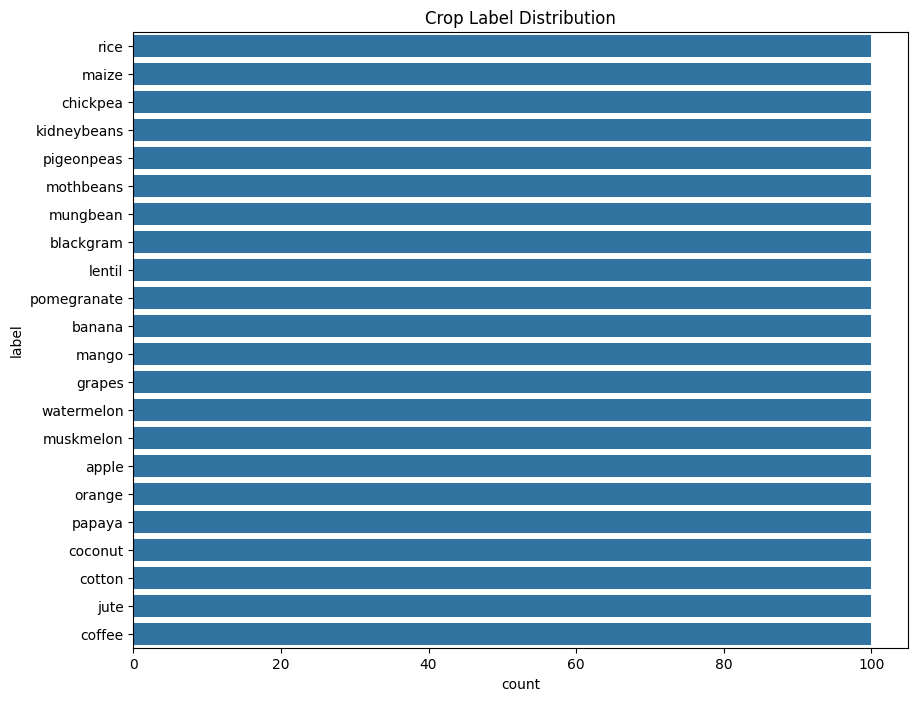

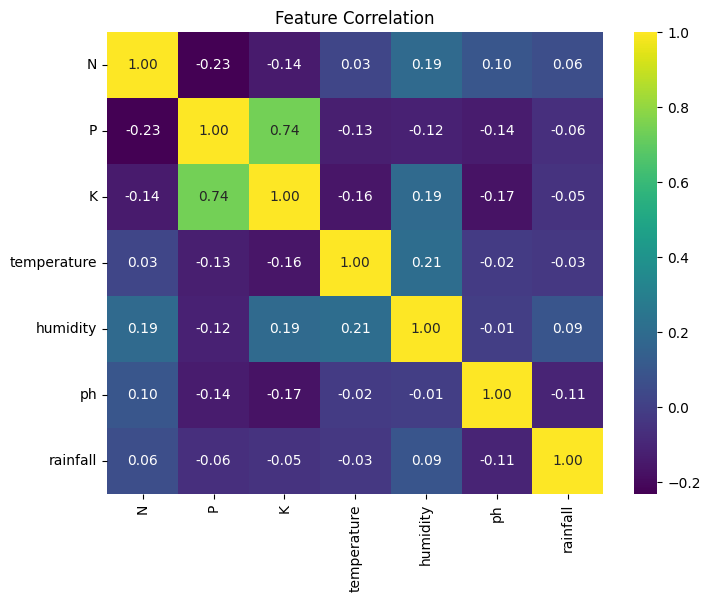

In [3]:
# Step 4: Explore Dataset - Fixed
print("Shape:", df.shape)
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

display(df.describe().T)

plt.figure(figsize=(10,8))
order = df['label'].value_counts().index
sns.countplot(y='label', data=df, order=order)
plt.title("Crop Label Distribution")
plt.show()

# Correlation heatmap only on numeric features
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title("Feature Correlation")
plt.show()

In [5]:
# --- Step 5: Preprocessing ---
X = df.drop("label", axis=1)
y = df["label"].copy()

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("✅ Classes Encoded:", list(le.classes_))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

✅ Classes Encoded: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


🎯 Random Forest Accuracy: 0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orang

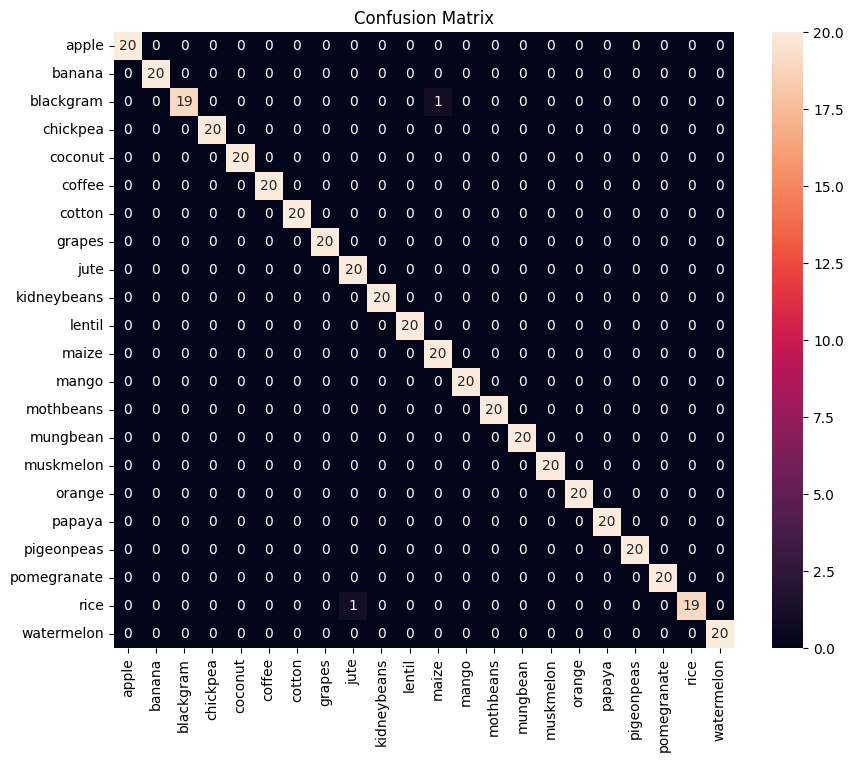

In [6]:
# --- Step 6: Train Random Forest ---
rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.show()

In [7]:
# --- Step 7: Hyperparameter Tuning (Optional, can skip if slow) ---
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

gs = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                  param_grid, cv=3, n_jobs=-1, scoring="accuracy", verbose=1)

gs.fit(X_train_scaled, y_train)

print("Best Parameters:", gs.best_params_)
best_rf = gs.best_estimator_

y_pred_gs = best_rf.predict(X_test_scaled)
print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_gs))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Tuned RF Accuracy: 0.9931818181818182


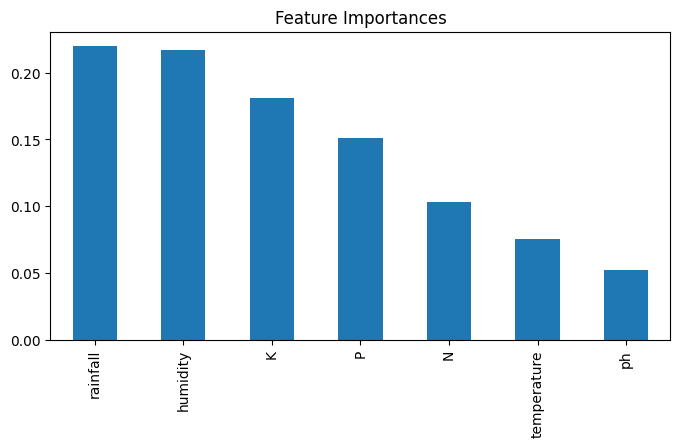

In [8]:
# --- Step 8: Feature Importance ---
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importances.plot(kind="bar", figsize=(8,4), title="Feature Importances")
plt.show()

In [9]:
# --- Step 9: Save Model Artifacts for Streamlit ---
with open("crop_recommendation_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Model files saved (crop_recommendation_model.pkl, scaler.pkl, label_encoder.pkl)")

# Download files to your system
from google.colab import files
files.download("crop_recommendation_model.pkl")
files.download("scaler.pkl")
files.download("label_encoder.pkl")

✅ Model files saved (crop_recommendation_model.pkl, scaler.pkl, label_encoder.pkl)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- Step 10: Quick Test Function ---
def predict_crop(model, scaler, label_encoder, sample_dict):
    sample_df = pd.DataFrame([sample_dict])
    Xs = scaler.transform(sample_df)
    pred = model.predict(Xs)
    return label_encoder.inverse_transform(pred)[0]

sample = {'N':90, 'P':42, 'K':43, 'temperature':20.8, 'humidity':82.0, 'ph':6.5, 'rainfall':200}
print("🌾 Sample Prediction:", predict_crop(rf, scaler, le, sample))